# Import 需要的工具

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
from tensorflow.keras import regularizers

# data argumentation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Dir="D:/圖形識別/HW3/money/train"
train = ImageDataGenerator(
    rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_generator = train.flow_from_directory(Dir,class_mode='categorical',classes=['100','500','1000'])

Found 30 images belonging to 3 classes.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Dir="D:/圖形識別/HW3/money/test"
test = ImageDataGenerator(
    rescale=1./255)
test_generator = test.flow_from_directory(Dir,class_mode='categorical',classes=['100','500','1000'])

Found 30 images belonging to 3 classes.


# CNN

In [4]:
model = Sequential()
model.add(Conv2D(8, (3, 3),input_shape=(256, 256,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax',kernel_regularizer=regularizers.l2(0.01)))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      2336      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                3936288   
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

In [5]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
his=model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=5)

Epoch 1/5
10/10 [==============================] - 6s 586ms/step - loss: 2.0260 - accuracy: 0.3800
Epoch 2/5
10/10 [==============================] - 6s 551ms/step - loss: 0.9868 - accuracy: 0.5633
Epoch 3/5
10/10 [==============================] - 6s 564ms/step - loss: 0.7162 - accuracy: 0.7733
Epoch 4/5
10/10 [==============================] - 6s 551ms/step - loss: 0.4906 - accuracy: 0.8433
Epoch 5/5
10/10 [==============================] - 6s 556ms/step - loss: 0.3152 - accuracy: 0.8900


In [7]:
model.evaluate(test_generator)

1/1 [==============================] - 0s 188ms/step - loss: 0.4223 - accuracy: 0.8333


[0.4222869873046875, 0.8333333]

# Training 過程

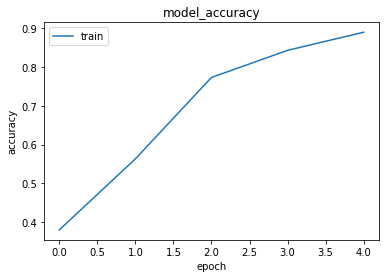

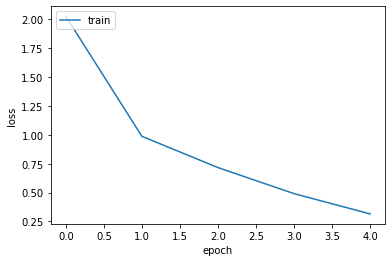

In [8]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(his.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()